## Initial EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv("option_train.csv")
test_df = pd.read_csv("option_test_wolabel.csv") #test model and return predictions for submission

In [3]:
train_df.info()
train_df.describe() #numeric features

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1680 entries, 0 to 1679
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Value   1680 non-null   float64
 1   S       1680 non-null   float64
 2   K       1680 non-null   int64  
 3   tau     1680 non-null   float64
 4   r       1680 non-null   float64
 5   BS      1680 non-null   object 
dtypes: float64(4), int64(1), object(1)
memory usage: 78.9+ KB


,Value,S,K,tau,r
count,1680.000000,1680.000000,1680.000000,1680.000000,1680.000000
mean,15.064384,440.901494,438.247024,0.201930,0.030235
std,14.035795,7.527497,23.396936,0.099712,0.000557
min,0.125000,425.472331,375.000000,0.003968,0.029510
25%,2.255001,433.863864,420.000000,0.119048,0.029820
50%,11.190967,442.579723,440.000000,0.202381,0.030130
75%,25.744375,447.320414,455.000000,0.285714,0.030540
max,60.149367,455.880619,500.000000,0.392857,0.031880


In [4]:
print(sum(train_df.BS == "Under")) #total under-valued
1680-946 #total over-valued

946


734

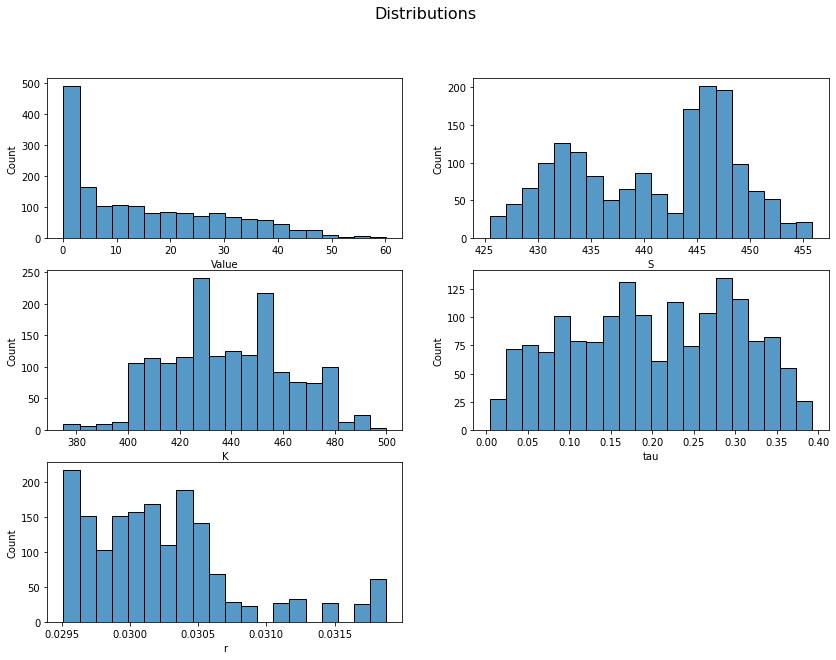

In [5]:
train_nums = train_df.select_dtypes(["float64","int64"])

f, axes = plt.subplots(3,2, figsize=(14, 10), sharex=False)

x=0
for i in range(3):
    for j in range(2):
        sns.histplot(x=train_nums[train_nums.columns[x]],ax=axes[i,j],bins=20)
        x+=1
        if x==5:
            break

f.suptitle('Distributions', fontsize=16)

f.delaxes(axes[2][1])
plt.show()

Non-gaussian distributions (use normalization for scaling)

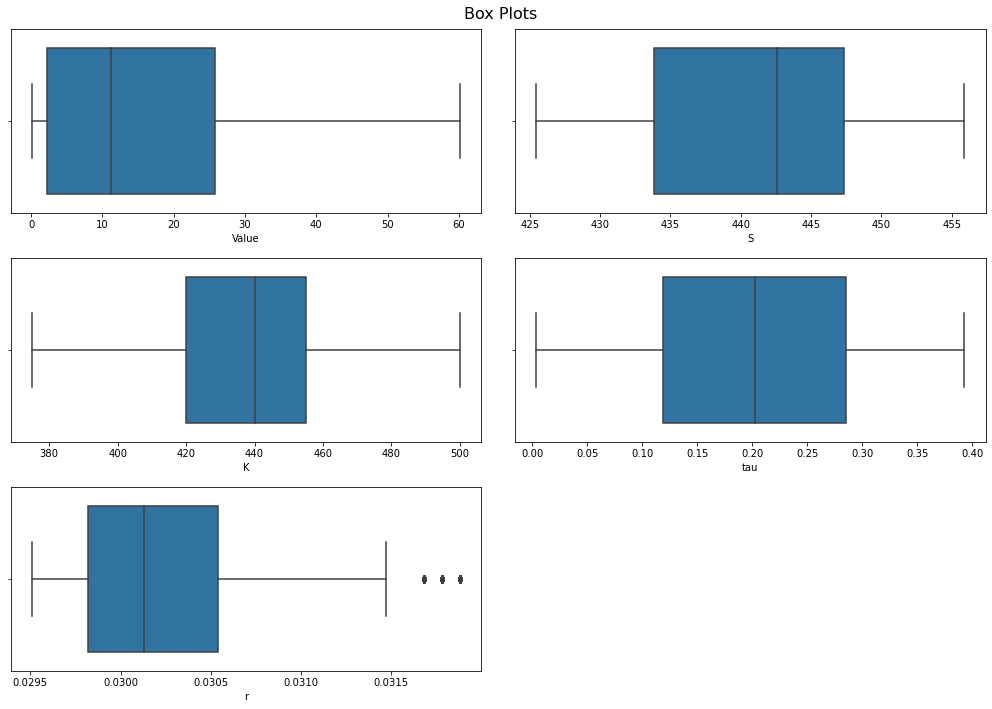

In [6]:
train_nums = train_df.select_dtypes(["float64","int64"])

f, axes = plt.subplots(3,2, figsize=(14, 10), sharex=False)

x=0
for i in range(3):
    for j in range(2):
        sns.boxplot(x=train_nums[train_nums.columns[x]],ax=axes[i,j])
        x+=1
        if x==5:
            break

f.suptitle('Box Plots', fontsize=16)

f.tight_layout()
f.delaxes(axes[2][1])
plt.show()

- Potential outliers for r column
- Right skew for r and value

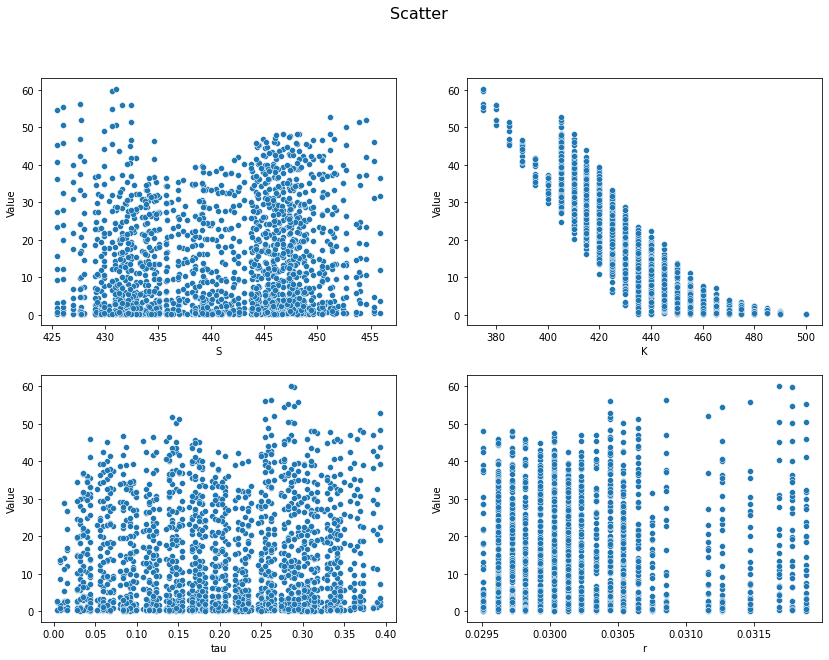

In [7]:
train_nums = train_df.select_dtypes(["float64","int64"])

f, axes = plt.subplots(2,2, figsize=(14, 10), sharex=False)

features = train_nums.columns[1:]
x=0
for i in range(2):
    for j in range(2):
        sns.scatterplot(y="Value",x=train_nums[features[x]],data=train_nums,ax=axes[i,j])
        x+=1
        if x==4:
            break

f.suptitle('Scatter', fontsize=16)
plt.show()

No strong linear trends except between value and k. 

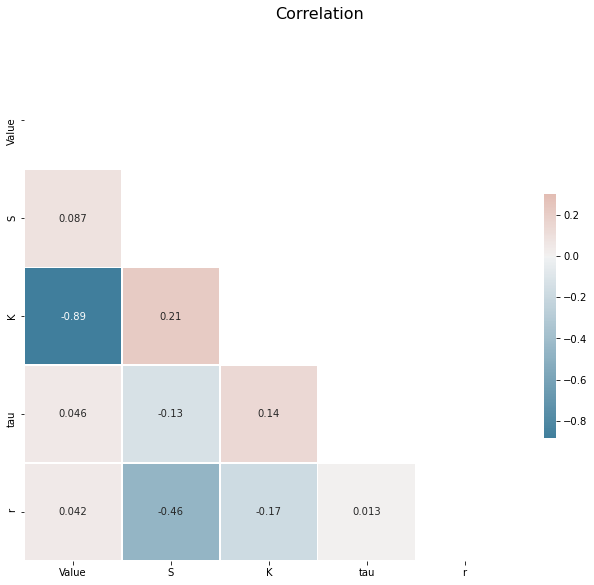

In [8]:
#correleogram
corr = train_nums.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5},annot=True)

f.suptitle("Correlation",fontsize=16)
plt.show()

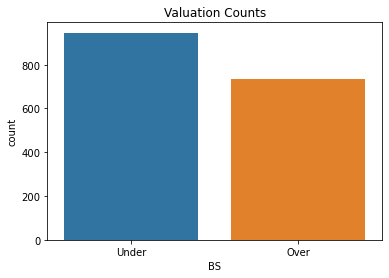

In [9]:
sns.countplot(x="BS",data=train_df).set_title("Valuation Counts")
plt.show()